In [1]:
import pickle
import os
from utils import train_agent, plot_rewards, evaluate_and_plot_transactions

def save_agents(agent_G, agent_C, folder='saved_agents', tag='experiment'):
    if not os.path.exists(folder):
        os.makedirs(folder)

    with open(os.path.join(folder, f'{tag}_generator.pkl'), 'wb') as f:
        pickle.dump(agent_G, f)

    if agent_C is not None:
        with open(os.path.join(folder, f'{tag}_consumer.pkl'), 'wb') as f:
            pickle.dump(agent_C, f)

def train_and_evaluate(
    mode='MM', 
    total_steps=50000, 
    eval_interval=1000, 
    eval_episodes=500, 
    save_folder='saved_agents', 
    experiment_name='p2p_marl_experiment'
):
    print(f"Starting training in mode: {mode}")

    # Train agents
    agent_G, agent_C, reward_history = train_agent(
        mode=mode,
        total_steps=total_steps,
        eval_interval=eval_interval
    )

    # Save agents
    # save_agents(agent_G, agent_C, folder=save_folder, tag=experiment_name)

    # Plot training rewards
    plot_rewards(reward_history, title=f'Rewards ({mode})')

    # Evaluate performance
    # print("\nPolicy Evaluation:")
    # evaluate_policy(agent_G, agent_C, episodes=eval_episodes)

    # # Visualize how price and cost evolve
    # evaluate_and_plot_transactions(agent_G, agent_C, episodes=eval_episodes)

    return agent_G, agent_C


In [2]:
agent_G, agent_C, reward_history = train_agent(
    mode='MM',
    total_steps=1000,
    eval_interval=10
)

Training Mode: MM:   0%|          | 0/1000 [00:00<?, ?it/s]

Training Mode: MM: 100%|██████████| 1000/1000 [00:01<00:00, 677.31it/s, games_played=1000]


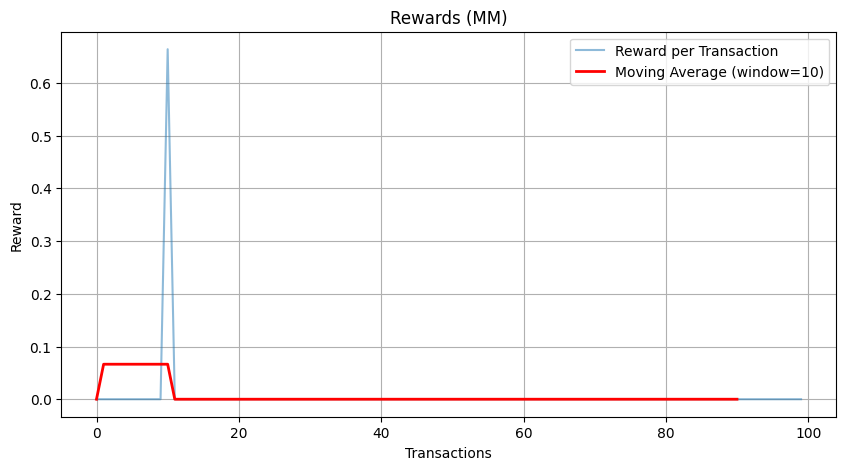

In [3]:
plot_rewards(reward_history, title=f'Rewards (MM)', window_size=10)

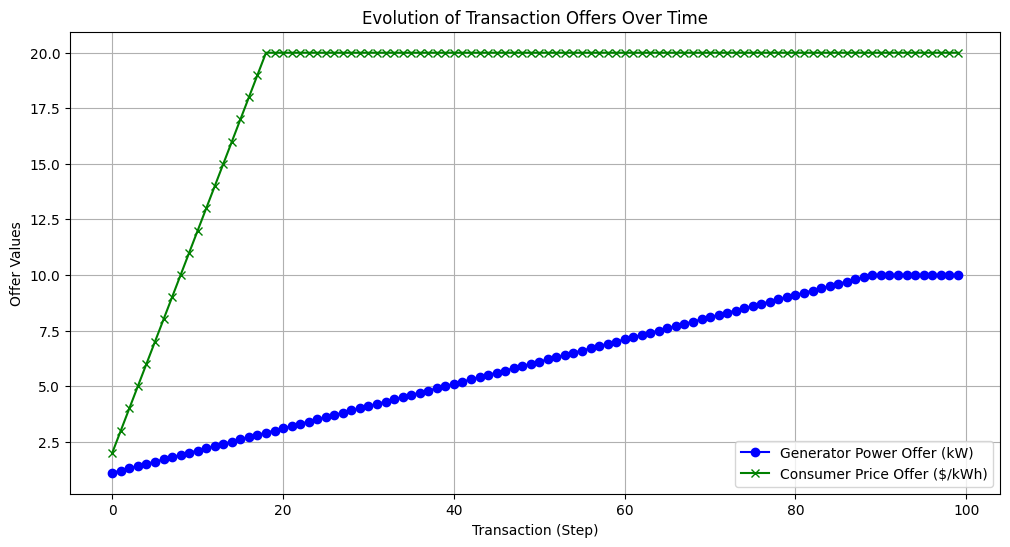

In [4]:
evaluate_and_plot_transactions(agent_G, agent_C, 1, 1, episodes=100)

In [5]:
import numpy as np
from scipy.optimize import minimize, minimize_scalar

# Define the function
def f(vars):
    x, y = vars
    return y - ( 0.1 * x**2 + 2 * x)

# Bounds (choose a reasonable domain for x and y)
bounds = [(0.1, 10), (1, 20)]

# Minimize
res_min = minimize(f, x0=(0, 0), bounds=bounds)

# To find max, minimize the negative of f
res_max = minimize(lambda vars: -f(vars), x0=(0, 0), bounds=bounds)

print("Minimum:")
print(f"Point: {res_min.x}, Value: {res_min.fun}")

print("\nMaximum:")
print(f"Point: {res_max.x}, Value: {-res_max.fun}")


Minimum:
Point: [10.  1.], Value: -29.0

Maximum:
Point: [ 0.1 20. ], Value: 19.799


In [6]:
from minimax_agent import MinimaxQAgent

GENERATOR_ACTIONS = [-0.1, 0.0, 0.1]  # Power adjustments
CONSUMER_ACTIONS = [-1, 0, 1]          # Price adjustments

agent = MinimaxQAgent('Prueba', GENERATOR_ACTIONS)

agent.solve_minimax_policy((5, 2))



array([0., 0., 1.])

In [7]:
from energy_market_env import EnergyMarketEnv

env1 = EnergyMarketEnv(init_gen_power=0.2, init_con_price=2, threshold=1)

actions_dict = {'generator': 0, 'consumer': 0}

next_state, reward, done = env1.step(actions_dict)
print(reward)

{'generator': 1.596, 'consumer': -1.596}
